<a href="https://colab.research.google.com/github/ChanWhanPark/AI_Projects/blob/main/FastCampus/1_%EB%A8%B8%EC%8B%A0_%EB%9F%AC%EB%8B%9D_%EB%B6%84%EB%A5%98/Chapter_04_%EC%98%A4%EB%8A%98_%EB%B0%A4_%EC%9C%A0%EB%9F%BD_%EC%B6%95%EA%B5%AC%2C_%EC%96%B4%EB%94%94%EA%B0%80_%EC%9D%B4%EA%B8%B8%EA%B9%8C__%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A1%9C_%EB%B6%84%EC%84%9D%ED%95%98%EA%B3%A0_%EB%82%B4%EA%B8%B0%EB%A5%BC_%EC%9D%B4%EA%B2%A8%EB%B3%B4%EC%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 오늘 밤 유럽 축구, 어디가 이길까? 데이터로 분석하고 내기를 이겨보자!
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 European Soccer Database 데이터셋을 사용합니다.
    
    - 다음 1개의 sqlite 데이터베이스를 사용합니다.
    database.sqlite

    - 데이터 베이스 내 총 7개의 Table을 사용합니다.
    Country: 국가 정보
    League: 리그 정보
    Match: 경기 정보 (주 데이터셋)
    Player: 플레이어 정보
    Player_Attributes: 플레이어의 특성
    Team: 팀 정보
    Team_Attributes: 팀의 특성
    
- 데이터 출처: https://www.kaggle.com/hugomathien/soccer

## 최종 목표
    - SQL 데이터셋에서 테이블을 읽어들이는 방법 이해
    - 여러개의 테이블을 통합하는 방법 이해
    - 수 많은 데이터로부터 관심있는 데이터를 식별
    - 학습된 모델로부터 인사이트 습득 방법 이해

- 출제자 : 신제용 강사
---

## Step 0. 데이터베이스와 SQL

### 데이터베이스란


### SQL과 Query


## Step 1. 데이터셋 준비하기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [ ]:
import os

In [ ]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'chananpark'
os.environ['KAGGLE_KEY'] = 'f913ac245220f1726af27cdd03dff668'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [ ]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d hugomathien/soccer
!unzip '*.zip'

 89% 29.0M/32.7M [00:01<00:00, 17.9MB/s]
100% 32.7M/32.7M [00:01<00:00, 22.6MB/s]
Archive:  soccer.zip
  inflating: database.sqlite         


In [ ]:
!ls

database.sqlite  sample_data  soccer.zip


### 문제 3. sqlite3와 Pandas로 sqlite 데이터베이스 읽어들이기


In [ ]:
import sqlite3

In [ ]:
# sqlite3.connect()와 pd.read_sql_query()로 csv파일 읽어들이기
conn = sqlite3.connect('database.sqlite')

df_country = pd.read_sql_query('SELECT * FROM Country', conn)
df_league = pd.read_sql_query('SELECT * FROM League', conn)
df_match = pd.read_sql_query('SELECT * FROM Match', conn)
df_player = pd.read_sql_query('SELECT * FROM Player', conn)
df_player_att = pd.read_sql_query('SELECT * FROM Player_Attributes', conn)
df_team = pd.read_sql_query('SELECT * FROM Team', conn)
df_team_att = pd.read_sql_query('SELECT * FROM Team_Attributes', conn)


## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 각 데이터프레임의 구조 파악하기


In [ ]:
# DataFrame에서 제공하는 메소드를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info(), describe())
df_country.head()
df_league.head()
df_match.head()
df_player.head()
df_player_att.head()
df_team.head()
df_team_att.head()


In [ ]:
df_country.info()
df_league.info()
df_match.info()
df_player.info()
df_player_att.info()
df_team.info()
df_team_att.info()

In [ ]:
df_country.describe()
df_league.describe()
df_match.describe()
df_player.describe()
df_player_att.describe()
df_team.describe()
df_team_att.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


df_country : 국가 이름과 ID     
df_league : ID, country_id(df_country의 ID와 같음)   
df_match : country_ID와 라운드, 단계, 팀 API, 골, 포메이션 활용 위한 좌표, 베팅 배당(베팅 배당 부분을 drop)
df_player : 선수 정보
df_player_att : 선수 상세 정보
df_team : 팀 정보
df_team_att : 팀 상세 정보보


In [ ]:
df_match.drop(df_match.columns[-38:], axis=1, inplace=True)

In [ ]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 문제 5. 데이터프레임간의 관계 파악하기


In [ ]:
# 데이터프레임 간 중복되는 Column이 있는지 확인하고 유용한 Column 식별하기
# Hint) unique()로 값을 비교하거나, map() 등을 활용하여 Column 관계를 확인
df_player_att['player_api_id'].value_counts()

210278    56
41269     56
42116     55
26472     54
179795    53
          ..
163254     2
266280     2
37366      2
238766     2
26568      2
Name: player_api_id, Length: 11060, dtype: int64

In [ ]:
df_match['home_player_1'].dropna().apply(int).map(df_player_att.groupby('player_api_id').mean()['overall_rating']).isna().sum()
## dropna() : NaN을 drop함
## apply() : 자료형 변경
## groupby() : 괄호 안의 문자열 기준으로 묶음

0

In [ ]:
df_team_att['team_api_id'].value_counts()

8191    6
8668    6
8661    6
8659    6
8658    6
       ..
8613    1
6631    1
6351    1
8614    1
9824    1
Name: team_api_id, Length: 288, dtype: int64

In [ ]:
df_match['away_team_api_id'].map(df_team_att.groupby('team_api_id').mean()['buildUpPlaySpeed']).isna().sum()

178

### 문제 6. 선수 특성 사이의 상관성 파악하기

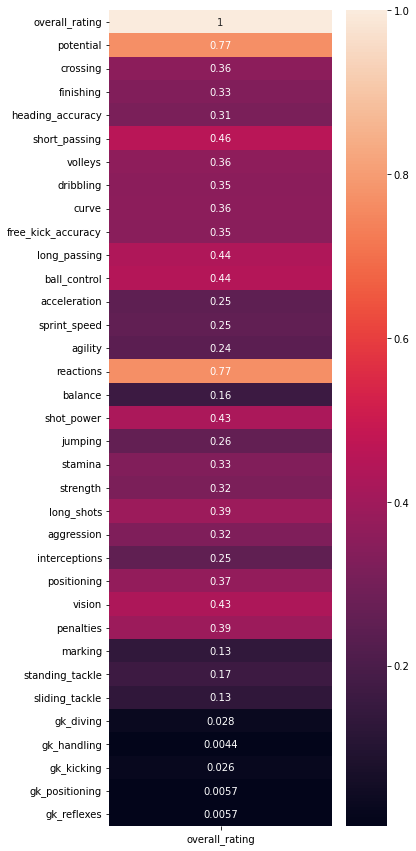

In [ ]:
# DataFrame의 corr() 메소드와 Seaborn의 heatmap() 메소드를 이용하여 Pearson's correlation 시각화하기
fig = plt.figure(figsize=(5, 15))
sns.heatmap(df_player_att.drop(['id', 'player_fifa_api_id', 'player_api_id'], axis=1).corr()[['overall_rating']], annot=True)

### 문제 7. 매치 데이터프레임에 팀 특성 데이터프레임 통합하기


In [ ]:
# DataFrame의 map() 메소드를 활용하여 데이터프레임 통합하기
df_team_att.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribblingClass',
       'buildUpPlayPassing', 'buildUpPlayPassingClass',
       'buildUpPlayPositioningClass', 'chanceCreationPassing',
       'chanceCreationPassingClass', 'chanceCreationCrossing',
       'chanceCreationCrossingClass', 'chanceCreationShooting',
       'chanceCreationShootingClass', 'chanceCreationPositioningClass',
       'defencePressure', 'defencePressureClass', 'defenceAggression',
       'defenceAggressionClass', 'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

In [ ]:
df_team_att.drop('buildUpPlayDribbling', axis=1, inplace=True)

In [ ]:
## X series의 첫 index 선택
def most(x):
  return x.value_counts().index[0]

In [ ]:
team_map = df_team_att.groupby('team_api_id').aggregate(
    {
      'buildUpPlaySpeed': 'mean',
      'buildUpPlaySpeedClass' : most, 
      'buildUpPlayDribblingClass': most,
      'buildUpPlayPassing' : 'mean', 
      'buildUpPlayPassingClass' : most,
      'buildUpPlayPositioningClass': most, 
      'chanceCreationPassing' : 'mean',
      'chanceCreationPassingClass':most,
      'chanceCreationCrossing' : 'mean',
      'chanceCreationCrossingClass': most, 
      'chanceCreationShooting' : 'mean',
      'chanceCreationShootingClass' : most, 
      'chanceCreationPositioningClass' : most,
      'defencePressure' : 'mean', 
      'defencePressureClass' : most, 
      'defenceAggression' : 'mean',
      'defenceAggressionClass' : most, 
      'defenceTeamWidth' : 'mean', 
      'defenceTeamWidthClass' : most,
      'defenceDefenderLineClass' : most
    }
)

In [ ]:
team_map

,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
team_api_id,,,,,,,,,,,,,,,,,,,,
1601,47.333333,Balanced,Little,46.166667,Mixed,Organised,55.500000,Normal,60.333333,Normal,53.500000,Normal,Organised,47.166667,Medium,47.333333,Press,49.333333,Normal,Cover
1773,52.000000,Balanced,Little,50.000000,Mixed,Organised,50.000000,Normal,53.000000,Normal,54.000000,Normal,Organised,43.000000,Medium,44.000000,Press,50.000000,Normal,Cover
1957,47.166667,Balanced,Little,52.666667,Mixed,Organised,50.833333,Normal,36.333333,Normal,67.000000,Lots,Organised,49.333333,Medium,56.333333,Press,53.666667,Normal,Cover
2033,49.000000,Balanced,Little,48.400000,Mixed,Organised,51.800000,Normal,44.200000,Normal,48.200000,Normal,Free Form,42.200000,Medium,33.800000,Contain,45.400000,Normal,Cover
2182,60.333333,Fast,Little,49.000000,Mixed,Organised,56.666667,Normal,57.333333,Normal,68.000000,Lots,Organised,51.666667,Medium,48.500000,Press,54.500000,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10281,52.833333,Balanced,Little,53.666667,Mixed,Organised,50.333333,Normal,59.166667,Lots,50.333333,Normal,Organised,45.500000,Medium,51.166667,Press,52.666667,Normal,Cover
108893,43.166667,Balanced,Little,53.166667,Mixed,Organised,46.000000,Normal,38.333333,Normal,39.500000,Normal,Organised,38.333333,Medium,46.000000,Press,46.333333,Normal,Cover
158085,67.000000,Balanced,Normal,39.000000,Mixed,Organised,55.000000,Normal,59.000000,Normal,46.000000,Normal,Organised,36.000000,Medium,38.000000,Press,37.000000,Normal,Cover


In [ ]:
df = df_match[['home_team_goal', 'away_team_goal']].copy()

In [ ]:
## 새로 만든 df에에 추가하는 과정
for team in ['home_', 'away_']:
  team_map.index.name = team + 'team_api_id'
  for col in team_map.columns:
    df[team + col] = df_match[team_map.index.name].map(team_map[col])

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()
## 홈팀과 어웨이 팀의 결과와 각 팀의 능력치를 보여줌

,home_team_goal,away_team_goal,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,home_chanceCreationCrossing,home_chanceCreationCrossingClass,home_chanceCreationShooting,home_chanceCreationShootingClass,home_chanceCreationPositioningClass,home_defencePressure,home_defencePressureClass,home_defenceAggression,home_defenceAggressionClass,home_defenceTeamWidth,home_defenceTeamWidthClass,home_defenceDefenderLineClass,away_buildUpPlaySpeed,away_buildUpPlaySpeedClass,away_buildUpPlayDribblingClass,away_buildUpPlayPassing,away_buildUpPlayPassingClass,away_buildUpPlayPositioningClass,away_chanceCreationPassing,away_chanceCreationPassingClass,away_chanceCreationCrossing,away_chanceCreationCrossingClass,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass
0,1,1,56.333333,Balanced,Little,44.333333,Mixed,Organised,55.666667,Normal,52.333333,Normal,55.833333,Normal,Organised,49.166667,Medium,50.666667,Press,59.833333,Normal,Cover,46.000000,Balanced,Little,41.500000,Mixed,Organised,46.000000,Normal,53.500000,Normal,53.750000,Normal,Organised,48.250000,Medium,49.000000,Press,58.750000,Wide,Cover
1,0,0,55.500000,Balanced,Little,52.666667,Mixed,Organised,50.000000,Normal,49.333333,Normal,41.500000,Little,Organised,48.666667,Medium,56.166667,Press,47.833333,Normal,Cover,64.000000,Balanced,Little,53.500000,Mixed,Organised,44.000000,Normal,47.666667,Normal,54.333333,Normal,Organised,48.833333,Medium,55.166667,Press,55.500000,Normal,Cover
2,0,3,53.666667,Balanced,Little,44.166667,Mixed,Organised,59.000000,Normal,60.333333,Normal,48.000000,Normal,Organised,60.166667,Medium,49.666667,Press,64.666667,Normal,Cover,51.333333,Balanced,Little,45.166667,Mixed,Organised,63.500000,Risky,55.000000,Normal,51.333333,Normal,Organised,59.666667,Medium,47.666667,Press,63.833333,Normal,Cover
3,5,0,54.166667,Balanced,Little,46.333333,Mixed,Organised,44.500000,Normal,64.666667,Normal,44.166667,Normal,Organised,51.333333,Medium,50.000000,Press,45.666667,Normal,Cover,51.666667,Balanced,Little,51.666667,Mixed,Organised,55.000000,Normal,60.666667,Lots,46.000000,Normal,Organised,46.000000,Medium,45.000000,Press,47.000000,Normal,Cover
5,1,1,56.666667,Balanced,Little,47.333333,Mixed,Organised,47.500000,Normal,49.833333,Normal,50.333333,Normal,Organised,47.666667,Medium,58.833333,Press,52.000000,Normal,Cover,49.166667,Balanced,Little,46.500000,Mixed,Organised,48.833333,Normal,55.833333,Normal,47.666667,Normal,Organised,53.666667,Medium,53.833333,Press,54.666667,Normal,Cover


### 문제 8. 홈과 어웨이의 골 수를 승-무-패 범주로 변환하기

In [ ]:
# 홈과 어웨이의 골 수를 범주형 데이터로 변환하기 (0: 홈팀 승, 1: 무승부, 2: 어웨이팀 승)
df['matchResult'] = df[['home_team_goal', 'away_team_goal']].aggregate(lambda x: 0 if x[0] > x[1] else 1 if x[0] == x[1] else 2, axis=1)
## 삼항 연산자 사용

In [ ]:
df

,home_team_goal,away_team_goal,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,home_chanceCreationCrossing,home_chanceCreationCrossingClass,home_chanceCreationShooting,home_chanceCreationShootingClass,home_chanceCreationPositioningClass,home_defencePressure,home_defencePressureClass,home_defenceAggression,home_defenceAggressionClass,home_defenceTeamWidth,home_defenceTeamWidthClass,home_defenceDefenderLineClass,away_buildUpPlaySpeed,away_buildUpPlaySpeedClass,away_buildUpPlayDribblingClass,away_buildUpPlayPassing,away_buildUpPlayPassingClass,away_buildUpPlayPositioningClass,away_chanceCreationPassing,away_chanceCreationPassingClass,away_chanceCreationCrossing,away_chanceCreationCrossingClass,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass,matchResult
0,1,1,56.333333,Balanced,Little,44.333333,Mixed,Organised,55.666667,Normal,52.333333,Normal,55.833333,Normal,Organised,49.166667,Medium,50.666667,Press,59.833333,Normal,Cover,46.000000,Balanced,Little,41.500000,Mixed,Organised,46.000000,Normal,53.500000,Normal,53.750000,Normal,Organised,48.250000,Medium,49.000000,Press,58.750000,Wide,Cover,1
1,0,0,55.500000,Balanced,Little,52.666667,Mixed,Organised,50.000000,Normal,49.333333,Normal,41.500000,Little,Organised,48.666667,Medium,56.166667,Press,47.833333,Normal,Cover,64.000000,Balanced,Little,53.500000,Mixed,Organised,44.000000,Normal,47.666667,Normal,54.333333,Normal,Organised,48.833333,Medium,55.166667,Press,55.500000,Normal,Cover,1
2,0,3,53.666667,Balanced,Little,44.166667,Mixed,Organised,59.000000,Normal,60.333333,Normal,48.000000,Normal,Organised,60.166667,Medium,49.666667,Press,64.666667,Normal,Cover,51.333333,Balanced,Little,45.166667,Mixed,Organised,63.500000,Risky,55.000000,Normal,51.333333,Normal,Organised,59.666667,Medium,47.666667,Press,63.833333,Normal,Cover,2
3,5,0,54.166667,Balanced,Little,46.333333,Mixed,Organised,44.500000,Normal,64.666667,Normal,44.166667,Normal,Organised,51.333333,Medium,50.000000,Press,45.666667,Normal,Cover,51.666667,Balanced,Little,51.666667,Mixed,Organised,55.000000,Normal,60.666667,Lots,46.000000,Normal,Organised,46.000000,Medium,45.000000,Press,47.000000,Normal,Cover,0
5,1,1,56.666667,Balanced,Little,47.333333,Mixed,Organised,47.500000,Normal,49.833333,Normal,50.333333,Normal,Organised,47.666667,Medium,58.833333,Press,52.000000,Normal,Cover,49.166667,Balanced,Little,46.500000,Mixed,Organised,48.833333,Normal,55.833333,Normal,47.666667,Normal,Organised,53.666667,Medium,53.833333,Press,54.666667,Normal,Cover,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25972,3,3,56.833333,Balanced,Little,50.000000,Mixed,Organised,48.000000,Normal,55.166667,Normal,53.500000,Normal,Organised,48.666667,Medium,46.000000,Press,55.666667,Normal,Cover,56.600000,Balanced,Little,35.800000,Mixed,Organised,63.200000,Normal,36.400000,Normal,59.000000,Normal,Organised,45.000000,Medium,42.800000,Press,51.600000,Normal,Cover,1
25974,1,0,47.600000,Balanced,Little,51.800000,Mixed,Organised,39.800000,Normal,45.200000,Normal,44.400000,Normal,Organised,43.800000,Medium,45.600000,Press,50.800000,Normal,Cover,56.600000,Balanced,Little,35.800000,Mixed,Organised,63.200000,Normal,36.400000,Normal,59.000000,Normal,Organised,45.000000,Medium,42.800000,Press,51.600000,Normal,Cover,0
25975,1,2,53.000000,Balanced,Little,56.000000,Mixed,Organised,38.000000,Normal,53.000000,Normal,46.000000,Normal,Organised,42.000000,Medium,33.000000,Contain,58.000000,Normal,Cover,51.833333,Balanced,Little,52.500000,Mixed,Organised,53.

In [ ]:
df.drop(['home_team_goal', 'away_team_goal'], axis=1, inplace=True)

In [ ]:
df

,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,home_chanceCreationCrossing,home_chanceCreationCrossingClass,home_chanceCreationShooting,home_chanceCreationShootingClass,home_chanceCreationPositioningClass,home_defencePressure,home_defencePressureClass,home_defenceAggression,home_defenceAggressionClass,home_defenceTeamWidth,home_defenceTeamWidthClass,home_defenceDefenderLineClass,away_buildUpPlaySpeed,away_buildUpPlaySpeedClass,away_buildUpPlayDribblingClass,away_buildUpPlayPassing,away_buildUpPlayPassingClass,away_buildUpPlayPositioningClass,away_chanceCreationPassing,away_chanceCreationPassingClass,away_chanceCreationCrossing,away_chanceCreationCrossingClass,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass,matchResult
0,56.333333,Balanced,Little,44.333333,Mixed,Organised,55.666667,Normal,52.333333,Normal,55.833333,Normal,Organised,49.166667,Medium,50.666667,Press,59.833333,Normal,Cover,46.000000,Balanced,Little,41.500000,Mixed,Organised,46.000000,Normal,53.500000,Normal,53.750000,Normal,Organised,48.250000,Medium,49.000000,Press,58.750000,Wide,Cover,1
1,55.500000,Balanced,Little,52.666667,Mixed,Organised,50.000000,Normal,49.333333,Normal,41.500000,Little,Organised,48.666667,Medium,56.166667,Press,47.833333,Normal,Cover,64.000000,Balanced,Little,53.500000,Mixed,Organised,44.000000,Normal,47.666667,Normal,54.333333,Normal,Organised,48.833333,Medium,55.166667,Press,55.500000,Normal,Cover,1
2,53.666667,Balanced,Little,44.166667,Mixed,Organised,59.000000,Normal,60.333333,Normal,48.000000,Normal,Organised,60.166667,Medium,49.666667,Press,64.666667,Normal,Cover,51.333333,Balanced,Little,45.166667,Mixed,Organised,63.500000,Risky,55.000000,Normal,51.333333,Normal,Organised,59.666667,Medium,47.666667,Press,63.833333,Normal,Cover,2
3,54.166667,Balanced,Little,46.333333,Mixed,Organised,44.500000,Normal,64.666667,Normal,44.166667,Normal,Organised,51.333333,Medium,50.000000,Press,45.666667,Normal,Cover,51.666667,Balanced,Little,51.666667,Mixed,Organised,55.000000,Normal,60.666667,Lots,46.000000,Normal,Organised,46.000000,Medium,45.000000,Press,47.000000,Normal,Cover,0
5,56.666667,Balanced,Little,47.333333,Mixed,Organised,47.500000,Normal,49.833333,Normal,50.333333,Normal,Organised,47.666667,Medium,58.833333,Press,52.000000,Normal,Cover,49.166667,Balanced,Little,46.500000,Mixed,Organised,48.833333,Normal,55.833333,Normal,47.666667,Normal,Organised,53.666667,Medium,53.833333,Press,54.666667,Normal,Cover,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25972,56.833333,Balanced,Little,50.000000,Mixed,Organised,48.000000,Normal,55.166667,Normal,53.500000,Normal,Organised,48.666667,Medium,46.000000,Press,55.666667,Normal,Cover,56.600000,Balanced,Little,35.800000,Mixed,Organised,63.200000,Normal,36.400000,Normal,59.000000,Normal,Organised,45.000000,Medium,42.800000,Press,51.600000,Normal,Cover,1
25974,47.600000,Balanced,Little,51.800000,Mixed,Organised,39.800000,Normal,45.200000,Normal,44.400000,Normal,Organised,43.800000,Medium,45.600000,Press,50.800000,Normal,Cover,56.600000,Balanced,Little,35.800000,Mixed,Organised,63.200000,Normal,36.400000,Normal,59.000000,Normal,Organised,45.000000,Medium,42.800000,Press,51.600000,Normal,Cover,0
25975,53.000000,Balanced,Little,56.000000,Mixed,Organised,38.000000,Normal,53.000000,Normal,46.000000,Normal,Organised,42.000000,Medium,33.000000,Contain,58.000000,Normal,Cover,51.833333,Balanced,Little,52.500000,Mixed,Organised,53.000000,Normal,48.333333,Normal,61.000000,Normal,Organised,48.000000,Me

## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 9. get_dummies를 이용하여 범주형 데이터 전처리하기

In [ ]:
df.columns

Index(['home_buildUpPlaySpeed', 'home_buildUpPlaySpeedClass',
       'home_buildUpPlayDribblingClass', 'home_buildUpPlayPassing',
       'home_buildUpPlayPassingClass', 'home_buildUpPlayPositioningClass',
       'home_chanceCreationPassing', 'home_chanceCreationPassingClass',
       'home_chanceCreationCrossing', 'home_chanceCreationCrossingClass',
       'home_chanceCreationShooting', 'home_chanceCreationShootingClass',
       'home_chanceCreationPositioningClass', 'home_defencePressure',
       'home_defencePressureClass', 'home_defenceAggression',
       'home_defenceAggressionClass', 'home_defenceTeamWidth',
       'home_defenceTeamWidthClass', 'home_defenceDefenderLineClass',
       'away_buildUpPlaySpeed', 'away_buildUpPlaySpeedClass',
       'away_buildUpPlayDribblingClass', 'away_buildUpPlayPassing',
       'away_buildUpPlayPassingClass', 'away_buildUpPlayPositioningClass',
       'away_chanceCreationPassing', 'away_chanceCreationPassingClass',
       'away_chanceCreationCrossi

In [ ]:
col_cats = list(filter(lambda s: s.find('Class') >= 0, df.columns))
df_cats = pd.get_dummies(df[col_cats], drop_first=True)
df_cats

,home_buildUpPlaySpeedClass_Fast,home_buildUpPlaySpeedClass_Slow,home_buildUpPlayDribblingClass_Lots,home_buildUpPlayDribblingClass_Normal,home_buildUpPlayPassingClass_Mixed,home_buildUpPlayPassingClass_Short,home_buildUpPlayPositioningClass_Organised,home_chanceCreationPassingClass_Risky,home_chanceCreationPassingClass_Safe,home_chanceCreationCrossingClass_Lots,home_chanceCreationCrossingClass_Normal,home_chanceCreationShootingClass_Lots,home_chanceCreationShootingClass_Normal,home_chanceCreationPositioningClass_Organised,home_defencePressureClass_High,home_defencePressureClass_Medium,home_defenceAggressionClass_Double,home_defenceAggressionClass_Press,home_defenceTeamWidthClass_Normal,home_defenceTeamWidthClass_Wide,home_defenceDefenderLineClass_Offside Trap,away_buildUpPlaySpeedClass_Fast,away_buildUpPlaySpeedClass_Slow,away_buildUpPlayDribblingClass_Lots,away_buildUpPlayDribblingClass_Normal,away_buildUpPlayPassingClass_Mixed,away_buildUpPlayPassingClass_Short,away_buildUpPlayPositioningClass_Organised,away_chanceCreationPassingClass_Risky,away_chanceCreationPassingClass_Safe,away_chanceCreationCrossingClass_Lots,away_chanceCreationCrossingClass_Normal,away_chanceCreationShootingClass_Lots,away_chanceCreationShootingClass_Normal,away_chanceCreationPositioningClass_Organised,away_defencePressureClass_High,away_defencePressureClass_Medium,away_defenceAggressionClass_Double,away_defenceAggressionClass_Press,away_defenceTeamWidthClass_Normal,away_defenceTeamWidthClass_Wide,away_defenceDefenderLineClass_Offside Trap
0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0
1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0
2,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,1,1,0,0
3,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,1,0,0
5,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25972,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0
25974,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0
25975,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0
25976,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0


### 문제 10. StandardScaler를 이용해 수치형 데이터 표준화하기


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
# Hint) Multicollinearity를 피하기 위해 불필요한 컬럼은 drop한다.

X_num = df.drop(['matchResult'] + col_cats, axis = 1)
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)

X_cat = df_cats
X = pd.concat([X_scaled, X_cat], axis=1)
y = df['matchResult']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25629 entries, 0 to 25978
Data columns (total 58 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   home_buildUpPlaySpeed                          25629 non-null  float64
 1   home_buildUpPlayPassing                        25629 non-null  float64
 2   home_chanceCreationPassing                     25629 non-null  float64
 3   home_chanceCreationCrossing                    25629 non-null  float64
 4   home_chanceCreationShooting                    25629 non-null  float64
 5   home_defencePressure                           25629 non-null  float64
 6   home_defenceAggression                         25629 non-null  float64
 7   home_defenceTeamWidth                          25629 non-null  float64
 8   away_buildUpPlaySpeed                          25629 non-null  float64
 9   away_buildUpPlayPassing                        256

### 문제 11. 학습데이터와 테스트데이터 분리하기


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Step 4. Classification 모델 학습하기


### 문제 12. Logistic Regression 모델 생성/학습하기


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression(max_iter=10000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

### 문제 13. 모델 학습 결과 평가하기


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.49      0.87      0.63      3484
           1       0.36      0.01      0.01      1972
           2       0.44      0.30      0.36      2233

    accuracy                           0.48      7689
   macro avg       0.43      0.39      0.33      7689
weighted avg       0.45      0.48      0.39      7689



In [ ]:
print(sum((y_test == 0)) / len(y_test))
print(sum((y_test == 1)) / len(y_test))
print(sum((y_test == 2)) / len(y_test))

0.4531148393809338
0.2564702822213552
0.290414878397711


### 문제 14. XGBoost 모델 생성/학습하기


In [ ]:
from xgboost import XGBClassifier

In [ ]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

### 문제 15. 모델 학습 결과 평가하기


In [ ]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.50      0.90      0.65      3484
           1       0.28      0.01      0.01      1972
           2       0.51      0.32      0.39      2233

    accuracy                           0.50      7689
   macro avg       0.43      0.41      0.35      7689
weighted avg       0.45      0.50      0.41      7689



In [ ]:
print(sum((y_test == 0)) / len(y_test))
print(sum((y_test == 1)) / len(y_test))
print(sum((y_test == 2)) / len(y_test))

0.4531148393809338
0.2564702822213552
0.290414878397711


## Step5 모델 학습 결과 심화 분석하기


### 문제 16. Logistic Regression 모델 계수로 상관성 파악하기

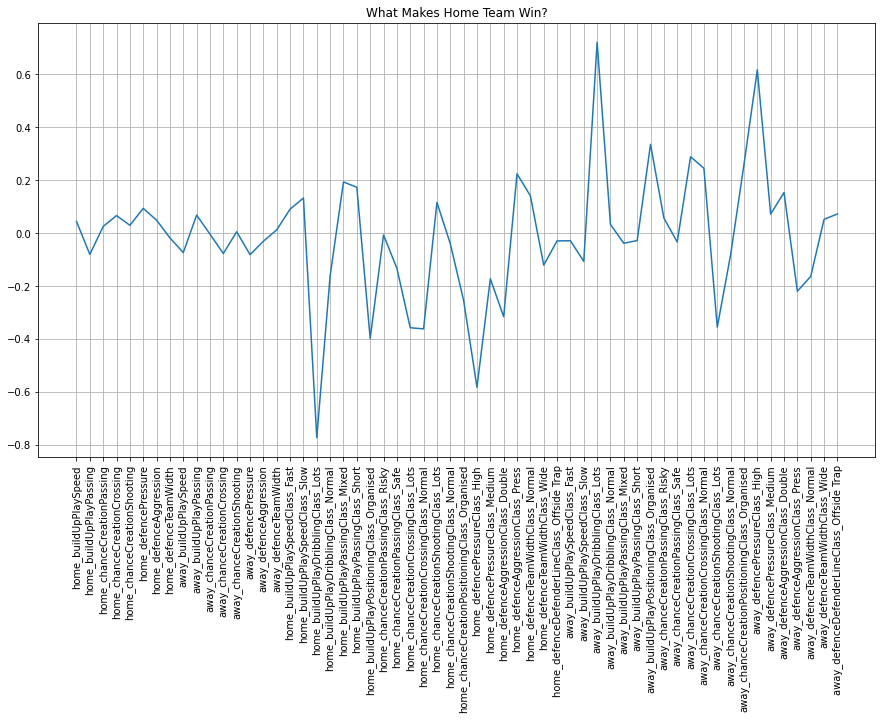

In [ ]:
# Logistic Regression 모델의 coef_ 속성을 plot하기
fig = plt.figure(figsize=(15, 8))
plt.plot(X.columns, model_lr.coef_[0])
plt.xticks(rotation=90)
plt.title('What Makes Home Team Win?')
plt.grid()
plt.show()

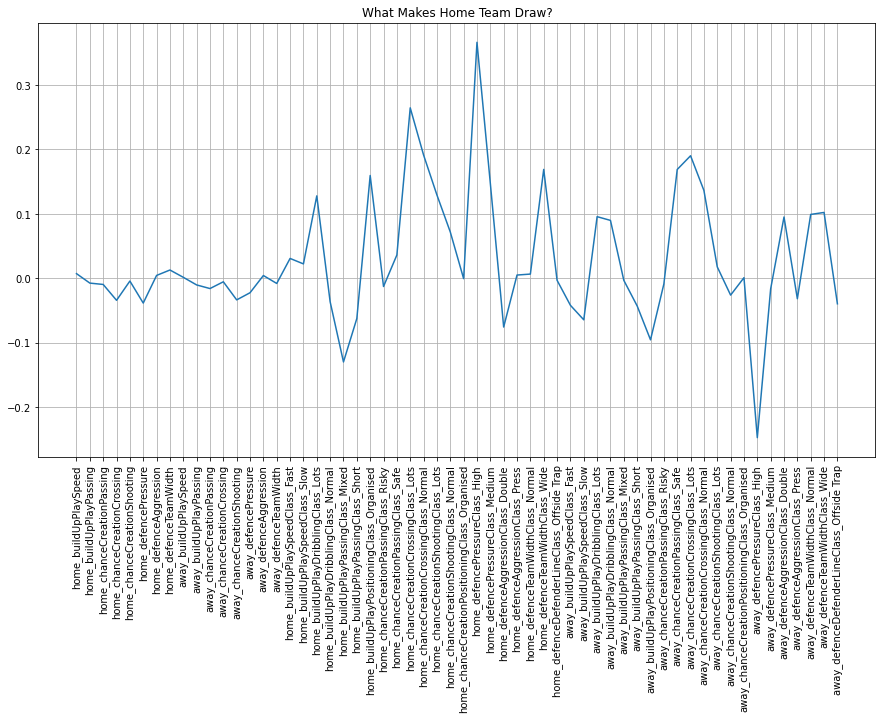

In [ ]:
fig = plt.figure(figsize=(15, 8))
plt.plot(X.columns, model_lr.coef_[1])
plt.title('What Makes Home Team Draw?')
plt.xticks(rotation=90)
plt.grid()
plt.show()

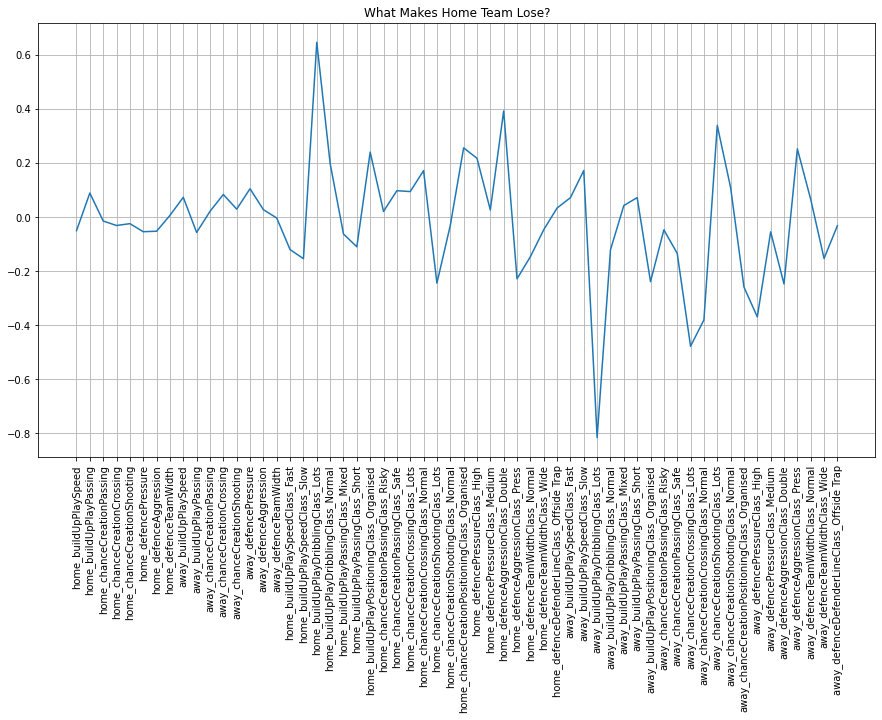

In [ ]:
fig = plt.figure(figsize=(15, 8))
plt.plot(X.columns, model_lr.coef_[2])
plt.title('What Makes Home Team Lose?')
plt.xticks(rotation=90)
plt.grid()
plt.show()

### 문제 17. XGBoost 모델로 특징의 중요도 확인하기

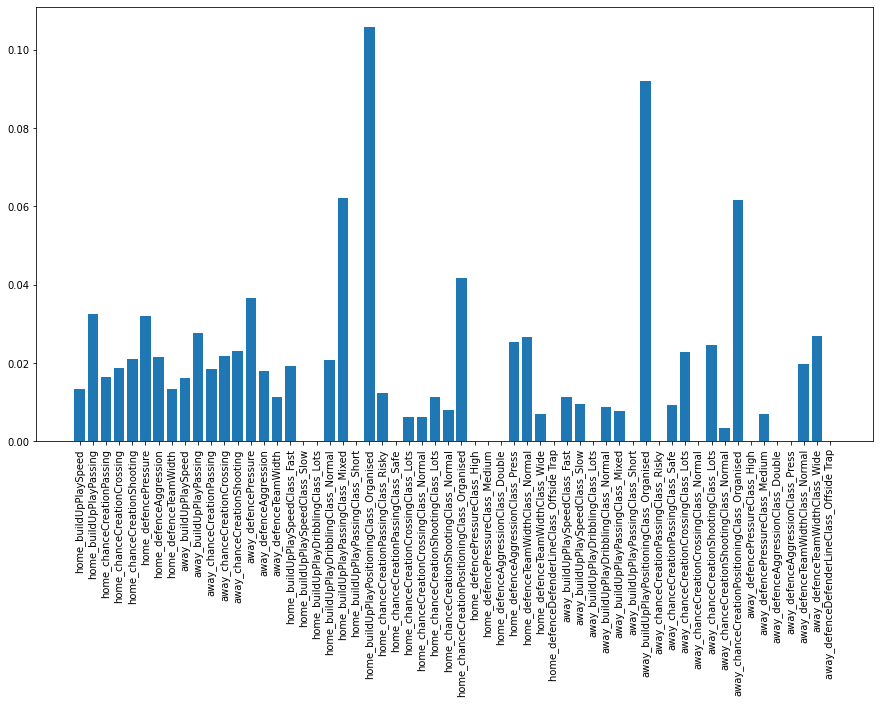

In [ ]:
# XGBoost 모델의 feature_importances_ 속성을 plot하기
fig = plt.figure(figsize=(15, 8))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()




수치보다 카테고리컬 데이터들이 더 많이 영향을 미친다는 것을 알 수 있다.

## Step6 모델 성능 개선하기


### 문제 18. 매치 데이터프레임에 선수 특성 데이터프레임 통합하기

In [ ]:
# 선수 특성 중 유의미한 정보를 매치 데이터프레임에 통합하기
df = df_match[['home_team_goal', 'away_team_goal']].copy()

In [ ]:
## 새로 만든 df에에 추가하는 과정
for team in ['home_', 'away_']:
  team_map.index.name = team + 'team_api_id'
  for col in team_map.columns:
    df[team + col] = df_match[team_map.index.name].map(team_map[col])

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()
## 홈팀과 어웨이 팀의 결과와 각 팀의 능력치를 보여줌

,home_team_goal,away_team_goal,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,home_chanceCreationCrossing,home_chanceCreationCrossingClass,home_chanceCreationShooting,home_chanceCreationShootingClass,home_chanceCreationPositioningClass,home_defencePressure,home_defencePressureClass,home_defenceAggression,home_defenceAggressionClass,home_defenceTeamWidth,home_defenceTeamWidthClass,home_defenceDefenderLineClass,away_buildUpPlaySpeed,away_buildUpPlaySpeedClass,away_buildUpPlayDribblingClass,away_buildUpPlayPassing,away_buildUpPlayPassingClass,away_buildUpPlayPositioningClass,away_chanceCreationPassing,away_chanceCreationPassingClass,away_chanceCreationCrossing,away_chanceCreationCrossingClass,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass
0,1,1,56.333333,Balanced,Little,44.333333,Mixed,Organised,55.666667,Normal,52.333333,Normal,55.833333,Normal,Organised,49.166667,Medium,50.666667,Press,59.833333,Normal,Cover,46.000000,Balanced,Little,41.500000,Mixed,Organised,46.000000,Normal,53.500000,Normal,53.750000,Normal,Organised,48.250000,Medium,49.000000,Press,58.750000,Wide,Cover
1,0,0,55.500000,Balanced,Little,52.666667,Mixed,Organised,50.000000,Normal,49.333333,Normal,41.500000,Little,Organised,48.666667,Medium,56.166667,Press,47.833333,Normal,Cover,64.000000,Balanced,Little,53.500000,Mixed,Organised,44.000000,Normal,47.666667,Normal,54.333333,Normal,Organised,48.833333,Medium,55.166667,Press,55.500000,Normal,Cover
2,0,3,53.666667,Balanced,Little,44.166667,Mixed,Organised,59.000000,Normal,60.333333,Normal,48.000000,Normal,Organised,60.166667,Medium,49.666667,Press,64.666667,Normal,Cover,51.333333,Balanced,Little,45.166667,Mixed,Organised,63.500000,Risky,55.000000,Normal,51.333333,Normal,Organised,59.666667,Medium,47.666667,Press,63.833333,Normal,Cover
3,5,0,54.166667,Balanced,Little,46.333333,Mixed,Organised,44.500000,Normal,64.666667,Normal,44.166667,Normal,Organised,51.333333,Medium,50.000000,Press,45.666667,Normal,Cover,51.666667,Balanced,Little,51.666667,Mixed,Organised,55.000000,Normal,60.666667,Lots,46.000000,Normal,Organised,46.000000,Medium,45.000000,Press,47.000000,Normal,Cover
5,1,1,56.666667,Balanced,Little,47.333333,Mixed,Organised,47.500000,Normal,49.833333,Normal,50.333333,Normal,Organised,47.666667,Medium,58.833333,Press,52.000000,Normal,Cover,49.166667,Balanced,Little,46.500000,Mixed,Organised,48.833333,Normal,55.833333,Normal,47.666667,Normal,Organised,53.666667,Medium,53.833333,Press,54.666667,Normal,Cover


In [ ]:
# 홈과 어웨이의 골 수를 범주형 데이터로 변환하기 (0: 홈팀 승, 1: 무승부, 2: 어웨이팀 승)
df['matchResult'] = df[['home_team_goal', 'away_team_goal']].aggregate(lambda x: 0 if x[0] > x[1] else 1 if x[0] == x[1] else 2, axis=1)
## 삼항 연산자 사용

In [ ]:
df.drop(['home_team_goal', 'away_team_goal'], axis=1, inplace=True)

In [ ]:
player_map = df_player_att.groupby('player_api_id').mean()['overall_rating']
player_map

player_api_id
2625      60.142857
2752      69.380952
2768      69.285714
2770      71.133333
2790      70.200000
            ...    
744907    51.909091
746419    59.000000
748432    58.000000
750435    56.444444
750584    58.000000
Name: overall_rating, Length: 11060, dtype: float64

In [ ]:
for col in (s + str(idx) for s in ['home_player_', 'away_player_'] for idx in range(1, 12)):
  df[col + '_rating'] = df_match[col].map(player_map)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,home_chanceCreationCrossing,home_chanceCreationCrossingClass,home_chanceCreationShooting,home_chanceCreationShootingClass,home_chanceCreationPositioningClass,home_defencePressure,home_defencePressureClass,home_defenceAggression,home_defenceAggressionClass,home_defenceTeamWidth,home_defenceTeamWidthClass,home_defenceDefenderLineClass,away_buildUpPlaySpeed,away_buildUpPlaySpeedClass,away_buildUpPlayDribblingClass,away_buildUpPlayPassing,away_buildUpPlayPassingClass,away_buildUpPlayPositioningClass,away_chanceCreationPassing,away_chanceCreationPassingClass,away_chanceCreationCrossing,away_chanceCreationCrossingClass,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass,matchResult,home_player_1_rating,home_player_2_rating,home_player_3_rating,home_player_4_rating,home_player_5_rating,home_player_6_rating,home_player_7_rating,home_player_8_rating,home_player_9_rating,home_player_10_rating,home_player_11_rating,away_player_1_rating,away_player_2_rating,away_player_3_rating,away_player_4_rating,away_player_5_rating,away_player_6_rating,away_player_7_rating,away_player_8_rating,away_player_9_rating,away_player_10_rating,away_player_11_rating
145,56.666667,Balanced,Little,47.333333,Mixed,Organised,47.5,Normal,49.833333,Normal,50.333333,Normal,Organised,47.666667,Medium,58.833333,Press,52.000000,Normal,Cover,56.333333,Balanced,Little,44.333333,Mixed,Organised,55.666667,Normal,52.333333,Normal,55.833333,Normal,Organised,49.166667,Medium,50.666667,Press,59.833333,Normal,Cover,0,63.214286,62.733333,70.151515,61.800000,69.192308,61.500000,63.538462,68.040000,54.600000,65.285714,62.666667,64.952381,71.388889,60.750000,66.750000,70.185185,69.333333,68.000000,65.000000,71.666667,64.611111,71.826087
153,53.666667,Balanced,Little,44.166667,Mixed,Organised,59.0,Normal,60.333333,Normal,48.000000,Normal,Organised,60.166667,Medium,49.666667,Press,64.666667,Normal,Cover,49.166667,Balanced,Little,46.500000,Mixed,Organised,48.833333,Normal,55.833333,Normal,47.666667,Normal,Organised,53.666667,Medium,53.833333,Press,54.666667,Normal,Cover,2,65.050000,63.142857,62.454545,63.227273,64.625000,71.800000,67.500000,66.000000,69.700000,67.129032,63.500000,71.266667,68.142857,70.375000,69.888889,70.720000,68.444444,68.541667,71.739130,71.190476,69.714286,69.130435
155,51.333333,Balanced,Little,45.166667,Mixed,Organised,63.5,Risky,55.000000,Normal,51.333333,Normal,Organised,59.666667,Medium,47.666667,Press,63.833333,Normal,Cover,55.500000,Balanced,Little,52.666667,Mixed,Organised,50.000000,Normal,49.333333,Normal,41.500000,Little,Organised,48.666667,Medium,56.166667,Press,47.833333,Normal,Cover,0,67.888889,71.060606,68.958333,69.823529,72.166667,72.107143,77.972973,71.416667,79.692308,68.086957,70.896552,67.095238,67.625000,61.750000,63.722222,63.411765,64.714286,68.000000,70.521739,67.500000,65.666667,66.083333
162,56.666667,Balanced,Little,47.333333,Mixed,Organised,47.5,Normal,49.833333,Normal,50.333333,Normal,Organised,47.666667,Medium,58.833333,Press,52.000000,Normal,Cover,51.333333,Balanced,Little,45.166667,Mixed,Organised,63.500000,Risky,55.000000,Normal,51.333333,Normal,Organised,59.666667,Medium,47.666667,Press,63.833333,Normal,Cover,0,63.214286,62.733333,70.151515,65.285714,68.040000,69.192308,61.800000,63.538462,54.600000,67.846154,62.666667,67.888889,71.060606,72.166667,64.100000,69.407407,72.107143,69.240000,79.692308,77.972973,71.416667,70.896552
168,55.500000,Balanced,Little,52.666667,Mixed,Organised,50.0,Normal,49.333333,Normal,41.500000,Little,Organised,48.666667,Medium,56.166667,Press,47.833333,Normal,Cover

### 문제 19. 모델 재학습하여 평가하기

In [ ]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
# Hint) Multicollinearity를 피하기 위해 불필요한 컬럼은 drop한다.

X_num = df.drop(['matchResult'] + col_cats, axis = 1)
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)

X_cat = pd.get_dummies(df[col_cats], drop_first=True)
X = pd.concat([X_scaled, X_cat], axis=1)
y = df['matchResult']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21246 entries, 145 to 25978
Data columns (total 78 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   home_buildUpPlaySpeed                          21246 non-null  float64
 1   home_buildUpPlayPassing                        21246 non-null  float64
 2   home_chanceCreationPassing                     21246 non-null  float64
 3   home_chanceCreationCrossing                    21246 non-null  float64
 4   home_chanceCreationShooting                    21246 non-null  float64
 5   home_defencePressure                           21246 non-null  float64
 6   home_defenceAggression                         21246 non-null  float64
 7   home_defenceTeamWidth                          21246 non-null  float64
 8   away_buildUpPlaySpeed                          21246 non-null  float64
 9   away_buildUpPlayPassing                        2

In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression(max_iter=10000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.56      0.83      0.66      2945
           1       0.28      0.01      0.02      1587
           2       0.48      0.50      0.49      1842

    accuracy                           0.53      6374
   macro avg       0.44      0.45      0.39      6374
weighted avg       0.47      0.53      0.45      6374



In [ ]:
print(sum((y_test == 0)) / len(y_test))
print(sum((y_test == 1)) / len(y_test))
print(sum((y_test == 2)) / len(y_test))

0.4620332601192344
0.24898023219328522
0.2889865076874804


In [ ]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.55      0.85      0.67      2945
           1       0.39      0.02      0.03      1587
           2       0.49      0.47      0.48      1842

    accuracy                           0.53      6374
   macro avg       0.47      0.44      0.39      6374
weighted avg       0.49      0.53      0.45      6374



In [ ]:
print(sum((y_test == 0)) / len(y_test))
print(sum((y_test == 1)) / len(y_test))
print(sum((y_test == 2)) / len(y_test))

0.4620332601192344
0.24898023219328522
0.2889865076874804


Logistic : 48 -> 53%   
XGB : 50 -> 53%   
로 성능 향상

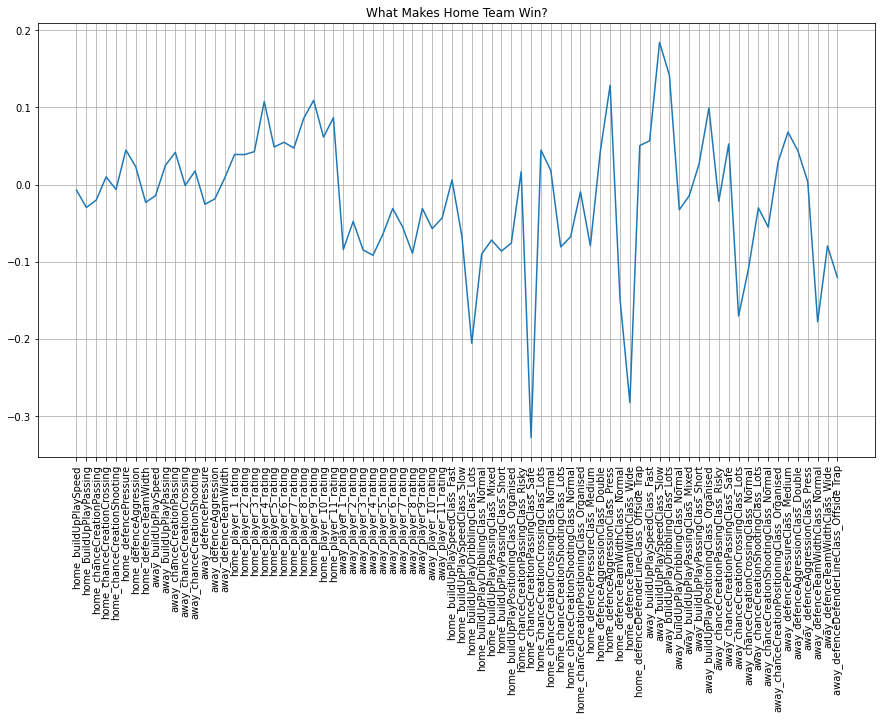

In [ ]:
# Logistic Regression 모델의 coef_ 속성을 plot하기
fig = plt.figure(figsize=(15, 8))
plt.plot(X.columns, model_lr.coef_[0])
plt.xticks(rotation=90)
plt.title('What Makes Home Team Win?')
plt.grid()
plt.show()

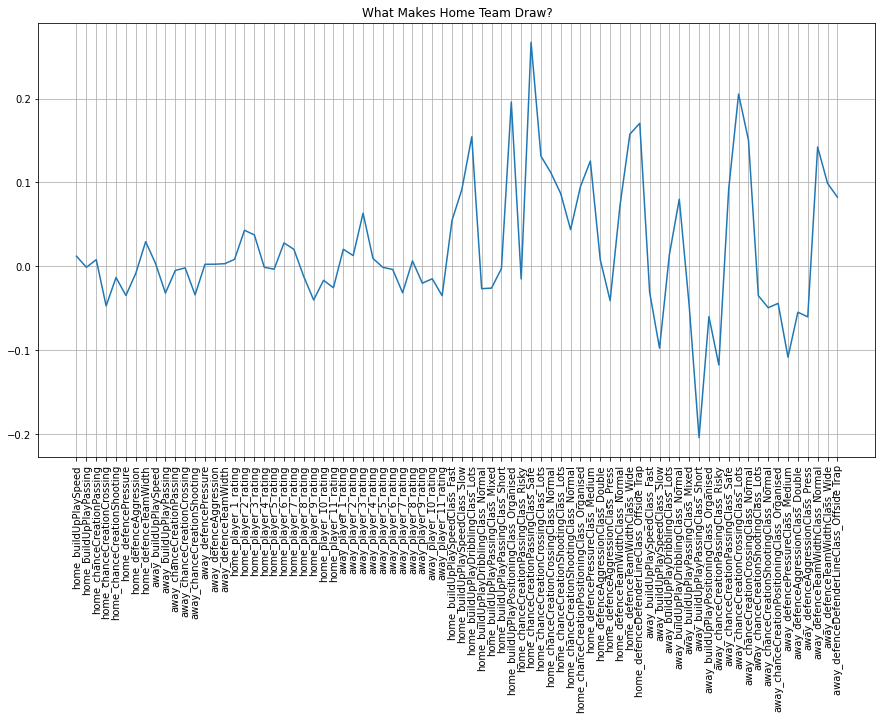

In [ ]:
fig = plt.figure(figsize=(15, 8))
plt.plot(X.columns, model_lr.coef_[1])
plt.title('What Makes Home Team Draw?')
plt.xticks(rotation=90)
plt.grid()
plt.show()

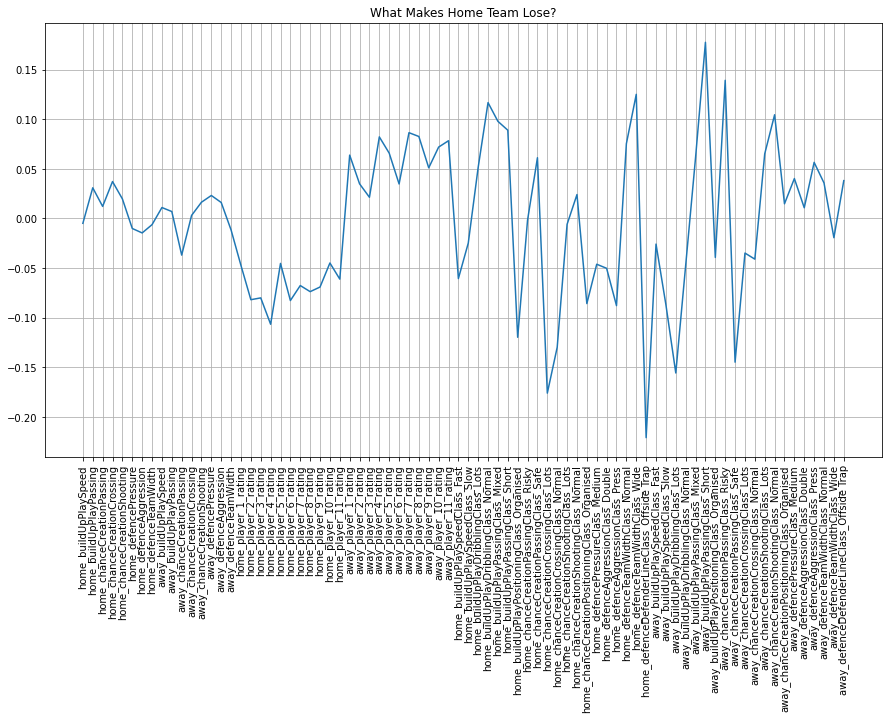

In [ ]:
fig = plt.figure(figsize=(15, 8))
plt.plot(X.columns, model_lr.coef_[2])
plt.title('What Makes Home Team Lose?')
plt.xticks(rotation=90)
plt.grid()
plt.show()

### 문제 17. XGBoost 모델로 특징의 중요도 확인하기

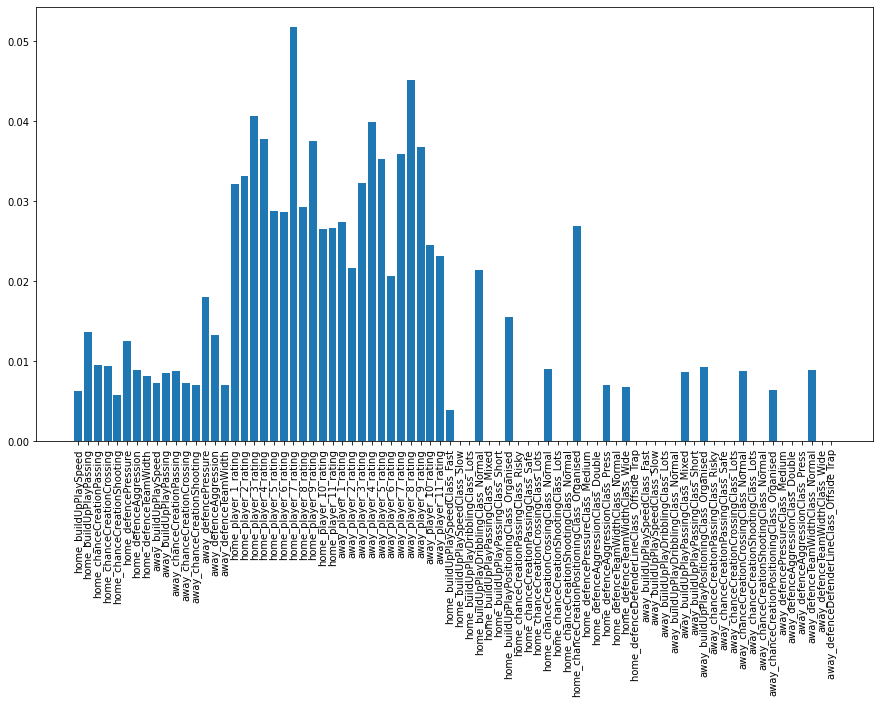

In [ ]:
# XGBoost 모델의 feature_importances_ 속성을 plot하기
fig = plt.figure(figsize=(15, 8))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()


